## Datetime operations

When our dataset contains time-related data, datetime operations are a great asset to our data science toolkit.
For this exercise we obtain a public covid dataset containing A LOT of information on infection cases, deaths, tests and vaccinations.

Let's start by importing the data, as the dataset is about 60MB at the time of writing, this might take some time.
Perhaps you could think of a method to make this more efficient, do we always need all of the data?

More info about the data can be found [here](https://github.com/owid/covid-19-data/tree/master/public/data)

In [1]:
import pandas as pd

In [2]:
covid_df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', on_bad_lines='skip')
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


As mentioned a lot of information is present here, about 65 columns. yet for this exercise my main objective is the 'date' column.
If we would print out the data types using the info method, we can see that the date is recognized as an 'object' stating that it is an ordinary string, not a datetime. 

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121749 entries, 0 to 121748
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121749 non-null  object 
 1   continent                                116207 non-null  object 
 2   location                                 121749 non-null  object 
 3   date                                     121749 non-null  object 
 4   total_cases                              115518 non-null  float64
 5   new_cases                                115514 non-null  float64
 6   new_cases_smoothed                       114500 non-null  float64
 7   total_deaths                             104708 non-null  float64
 8   new_deaths                               104862 non-null  float64
 9   new_deaths_smoothed                      114500 non-null  float64
 10  total_cases_per_million         

We would like to change that, as we can only perform datetime operations if pandas recognises the datetime format used.
Good for us, pandas has a method to automatically infer the date format, we do that now.

In [4]:
covid_df.date = pd.to_datetime(covid_df.date)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121749 entries, 0 to 121748
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   iso_code                                 121749 non-null  object        
 1   continent                                116207 non-null  object        
 2   location                                 121749 non-null  object        
 3   date                                     121749 non-null  datetime64[ns]
 4   total_cases                              115518 non-null  float64       
 5   new_cases                                115514 non-null  float64       
 6   new_cases_smoothed                       114500 non-null  float64       
 7   total_deaths                             104708 non-null  float64       
 8   new_deaths                               104862 non-null  float64       
 9   new_deaths_smoothed       

now we are ready to perform datetime operations, however we can see that dates are appearing multiple times, this because we have records for multiple countries.
I live in Belgium, so decided to isolate that subsection of the data.
If they had used a data lake and partitioned into countries, reading out the data would have been much more efficient, but efficiency is not something I would expect from government as a Belgian.

In [5]:
covid_belgium_df = covid_df[covid_df.location=='Belgium'].set_index('date')
covid_belgium_df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-04,BEL,Europe,Belgium,1.0,1.0,NaN,NaN,NaN,NaN,0.086,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
2020-02-05,BEL,Europe,Belgium,1.0,0.0,NaN,NaN,NaN,NaN,0.086,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
2020-02-06,BEL,Europe,Belgium,1.0,0.0,NaN,NaN,NaN,NaN,0.086,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
2020-02-07,BEL,Europe,Belgium,1.0,0.0,NaN,NaN,NaN,NaN,0.086,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
2020-02-08,BEL,Europe,Belgium,1.0,0.0,NaN,NaN,NaN,NaN,0.086,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN


Now that we have our dataset containing only Belgium I would like to emphasize another aspect, for features such as population density we would not expect a 'head count' to differ each day, and as we can see this number is steady over the whole line (results may vary for those who execute this in the future).

In [6]:
covid_belgium_df.population.value_counts()

11632334.0    611
Name: population, dtype: int64

we only have a single value (in my case 11.6M) that is repeated over the whole dataset, would this look optimal to you? How would you perhaps approach this to improve data management? If you would like to go hands-on I left you a blank cell to experiment.

Optimalizations aside, we can not do that which we came for! Datetime operations, the first thing that I have in mind is that due to weekends, the cases might fluctuate a lot per day, so it is not optimal to view it on a daily basis.

First we create a simple line plot with the raw daily cases, then we perform a weekly sum to create a more smooth version of the new cases.

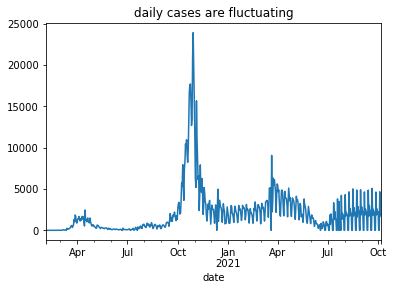

In [7]:
covid_belgium_df['new_cases'].plot(title='daily cases are fluctuating')

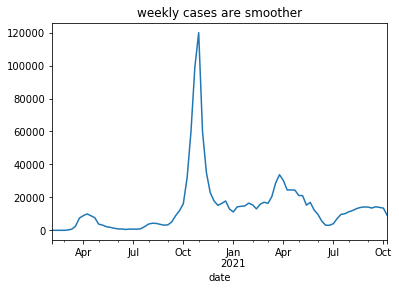

In [8]:
weekly_cases_df = covid_belgium_df['new_cases'].resample('W').sum()
weekly_cases_df.plot(title='weekly cases are smoother')

That looks great! Those who inspected carefully saw that the x-axis was correclty identified as datetimes and that the y-axis for weekly sums have a much higher range.

In a next example we would like to have the relative changes from week to week, this can be done using the shift operation.

In [9]:
weekly_cases_df.shift(1)

date
2020-02-09        NaN
2020-02-16        1.0
2020-02-23        0.0
2020-03-01        0.0
2020-03-08        1.0
               ...   
2021-09-12    14099.0
2021-09-19    13508.0
2021-09-26    14298.0
2021-10-03    13909.0
2021-10-10    13474.0
Freq: W-SUN, Name: new_cases, Length: 88, dtype: float64

This method shifted our data by 1 week forwards, this way we can subtract these results from our original data creating a relative increase (this_week_cases - last_week_cases).

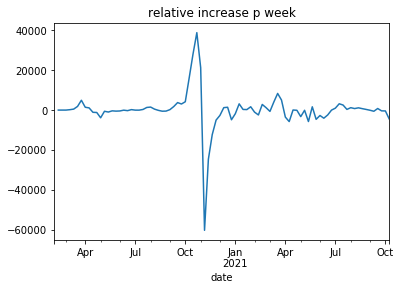

In [10]:
(weekly_cases_df-weekly_cases_df.shift(1)).plot(title='relative increase p week')

Another powerfull asset of datetimes is that we can utilize the concepts of days, weeks, months and years.
In Belgium they speak about a phenomenon called 'the weekend effect' where a lot of reports are delayed and therefore Sundays have less cases whereas Mondays have more.

Do we see that in our data? let us seperate the Sundays and Mondays and take a mean!

In [11]:
print('mean deaths on Monday')
covid_belgium_df.loc[covid_belgium_df.index.dayofweek==0,"new_deaths"].mean()

mean deaths on Monday


39.02439024390244

In [12]:
print('mean deaths on Sunday')
covid_belgium_df.loc[covid_belgium_df.index.dayofweek==6,"new_deaths"].mean()

mean deaths on Sunday


36.646341463414636

It seems indeed that more people are reported to pass away no a Monday than on a Sunday, it would be optimal to verify this with statistics, but for now we keep it simple.

As a last example I would like to use slicing of our dataset to demonstrate we can also take a subset of our data and handle this, here we took the months of dec2020-jan2021 for belgium and calculated the total deaths.

In [13]:
covid_belgium_df.loc['2020-12-01':'2021-01-31'].new_deaths.sum()

4447.0

Now let's compare this to our neighbours, the Netherlands and France, we do exactly the same operations by selecting exaclty the same time window.

In [14]:
covid_netherlands_df = covid_df[covid_df.location=='Netherlands'].set_index('date')
covid_netherlands_df.loc['2020-12-01':'2021-01-31'].new_deaths.sum()

4655.0

In [15]:
covid_france_df = covid_df[covid_df.location=='France'].set_index('date')
covid_france_df.loc['2020-12-01':'2021-01-31'].new_deaths.sum()

23382.0

You can see that Belgium has the lowest of total deaths in that time interval, so you could assume we performed the best! 
However this approach is a bit simplified as there are not as many Belgians as French and Dutch. Could you perhaps think if an improvement to create a better understanding?